In [19]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hinat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import pandas as pd
df1=messages = pd.read_csv('df_survey.csv')
df1.head()

,text,class
0,so jew hating muslim of them those sneaky jew...,explicit_hate
1,Stoni is a fuckin queer...,explicit_hate
2,they are out smarting u . anither proof had th...,explicit_hate
3,if the people of the state don't want faggots ...,explicit_hate
4,Soros needs to die like a diseased dog in the ...,explicit_hate


In [21]:
df1 = df1.dropna()

In [22]:
#df['text_cleaned'] = df['text'].str.replace('@[A-Za-z0-9]+\s?','', regex=True)

In [23]:
df1.shape

(899, 2)

In [24]:
df1['count'] = df1['text'].apply(lambda x: len(x.split()))

C:\Users\hinat\AppData\Local\Temp/ipykernel_12228/2064315619.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df1.head()

,text,class,count
0,so jew hating muslim of them those sneaky jew...,explicit_hate,22
1,Stoni is a fuckin queer...,explicit_hate,5
2,they are out smarting u . anither proof had th...,explicit_hate,23
3,if the people of the state don't want faggots ...,explicit_hate,22
4,Soros needs to die like a diseased dog in the ...,explicit_hate,14


In [26]:
plt.figure(figsize= (8, 8))

sns.displot(df1['count'])

plt.xlim(0, 200)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

<Figure size 576x576 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
category_count = df1['class'].value_counts()

categories = category_count.index

categories

Index(['not_hate', 'explicit_hate', 'implicit_hate', 'offensive'], dtype='object')

In [ ]:
category_count

not_hate         449
explicit_hate    150
implicit_hate    150
offensive        150
Name: class, dtype: int64

In [ ]:
category_count.index

Index(['not_hate', 'explicit_hate', 'implicit_hate', 'offensive'], dtype='object')

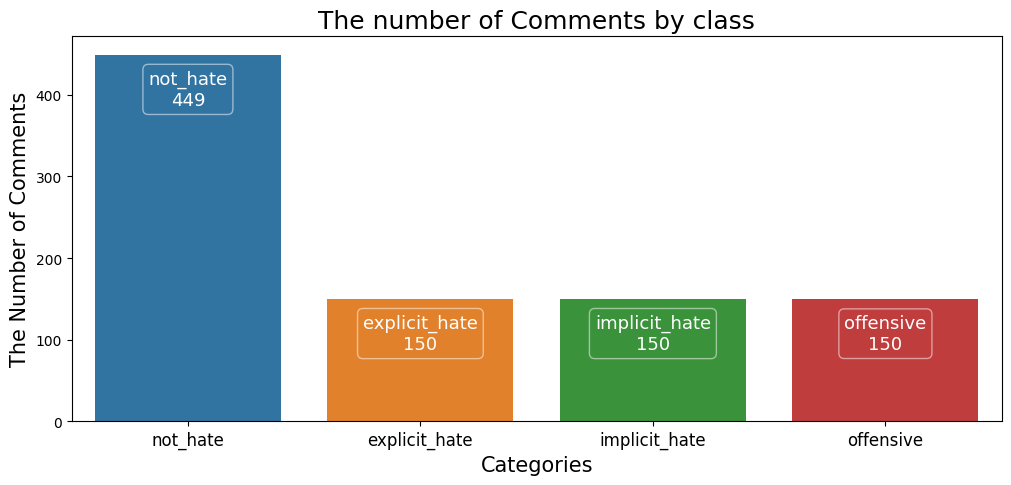

In [ ]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of Comments', size= 15)

plt.xticks(size = 12)

plt.title("The number of Comments by class" , size = 18)

plt.show()

In [ ]:
df1['class'].unique()

array(['explicit_hate', 'implicit_hate', 'offensive', 'not_hate'],
      dtype=object)

In [ ]:
df1['encoded_text'] = df1['class'].astype('category').cat.codes

df1.head(10)

C:\Users\hinat\AppData\Local\Temp/ipykernel_12228/3027608310.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,class,count,encoded_text
0,so jew hating muslim of them those sneaky jew...,explicit_hate,22,0
1,Stoni is a fuckin queer...,explicit_hate,5,0
2,they are out smarting u . anither proof had th...,explicit_hate,23,0
3,if the people of the state don't want faggots ...,explicit_hate,22,0
4,Soros needs to die like a diseased dog in the ...,explicit_hate,14,0
5,"RT ""@_ThatGAPeach: &amp; alla my niggas hot bo...",explicit_hate,18,0
6,Hey @RSherman_25 you're a nigger #racismisaliv...,explicit_hate,19,0
7,Just watched the scene in zero dark thirty whe...,explicit_hate,17,0
8,@fucktyler fuck you spear chucker,explicit_hate,5,0
9,". "" kill any jew who falls into your power ""...",explicit_hate,19,0


In [ ]:
df1['encoded_text'] = df1['class'].astype('category').cat.codes

df1.head(10)

C:\Users\duygu\AppData\Local\Temp\ipykernel_16520\3027608310.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,class,count,encoded_text
0,so jew hating muslim of them those sneaky jew...,explicit_hate,22,0
1,Stoni is a fuckin queer...,explicit_hate,5,0
2,they are out smarting u . anither proof had th...,explicit_hate,23,0
3,if the people of the state don't want faggots ...,explicit_hate,22,0
4,Soros needs to die like a diseased dog in the ...,explicit_hate,14,0
5,"RT ""@_ThatGAPeach: &amp; alla my niggas hot bo...",explicit_hate,18,0
6,Hey @RSherman_25 you're a nigger #racismisaliv...,explicit_hate,19,0
7,Just watched the scene in zero dark thirty whe...,explicit_hate,17,0
8,@fucktyler fuck you spear chucker,explicit_hate,5,0
9,". "" kill any jew who falls into your power ""...",explicit_hate,19,0


In [ ]:
data_texts = df1['text'].to_list()

data_labels = df1['encoded_text'].to_list()

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )


Downloading: 100%|██████████| 232k/232k [00:00<00:00, 377kB/s]  
c:\Users\hinat\anaconda3\lib\site-packages\huggingface_hub\file_download.py:125: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hinat\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development

Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 3.52kB/s]
Downloading: 100%|██████████| 483/483 [00:0

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))


val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [ ]:

model1 = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=4)

Downloading: 100%|██████████| 363M/363M [00:31<00:00, 11.5MB/s] 
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should pr

In [ ]:

from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments


training_args = TFTrainingArguments(
    output_dir='./results',          
    num_train_epochs=7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=64,   
    warmup_steps=500,                
    weight_decay=1e-5,               
    logging_dir='./logs',            
    eval_steps=100                   
)

with training_args.strategy.scope():
    trainer_model1 = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=4)

trainer = TFTrainer(
    model=trainer_model1,                 
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
)


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
trainer.train()

KeyboardInterrupt: 

In [ ]:
trainer.evaluate()

InvalidArgumentError: Graph execution error:

Detected at node 'tf_distil_bert_for_sequence_classification_4/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\duygu\AppData\Local\Temp\ipykernel_16520\2732109216.py", line 1, in <module>
      trainer.evaluate()
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer_tf.py", line 433, in evaluate
      output = self.prediction_loop(eval_ds, steps, num_examples, description="Evaluation")
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer_tf.py", line 328, in prediction_loop
      logits = self.distributed_prediction_steps(batch)
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer_tf.py", line 462, in distributed_prediction_steps
      logits = self.args.strategy.run(self.prediction_step, inputs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer_tf.py", line 449, in prediction_step
      per_example_loss, logits = self.run_model(features, labels, False)
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer_tf.py", line 748, in run_model
      if isinstance(labels, (dict)):
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer_tf.py", line 751, in run_model
      outputs = self.model(features, labels=labels, training=training)[:2]
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 813, in call
      loss = None if inputs["labels"] is None else self.hf_compute_loss(inputs["labels"], logits)
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 813, in call
      loss = None if inputs["labels"] is None else self.hf_compute_loss(inputs["labels"], logits)
    File "c:\ProgramData\Anaconda3\lib\site-packages\transformers\modeling_tf_utils.py", line 248, in hf_compute_loss
      return loss_fn(labels, logits)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'tf_distil_bert_for_sequence_classification_4/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 3 which is outside the valid range of [0, 2).  Label values: 2 0 3 0 2 2 2 3 3 1 2 0 3 2 2 3 3 2 2 2 0 2 2 2 2 0 1 2 2 2 1 2 2 3 2 2 3 3 2 2 2 1 0 2 2 2 1 0 0 2 2 1 3 1 2 1 0 2 3 2 2 1 1 2
	 [[{{node tf_distil_bert_for_sequence_classification_4/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_distributed_prediction_steps_18392]

In [ ]:
import numpy as np